In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle
%matplotlib inline

In [3]:
""" This code takes the weighted topics and makes visualizations"""

' This code takes the weighted topics and makes visualizations'

In [4]:
df = pd.read_csv('alltopics-weights.csv', header=0, index_col=0)

In [5]:
#average for each topic across all newspapers 
df['avg']=df.mean(axis=1)

In [6]:
df.head(5)

,atlantic,blaze,breitbart,fox,huffpo,inforwars,msnbc,npr,nyt,wsj,topics,global,specific,avg
0,0.011651,0.031047,0.017314,0.011856,0.023131,0.016347,0.013475,0.018407,0.036936,0.010820,think know thing could get even way,opinion,opinion,0.019098
1,0.024531,0.015711,0.017053,0.018924,0.010743,0.014995,0.015523,0.014298,0.011686,0.013621,officer police shot department incident san ki...,authority,police shooting,0.015709
2,0.008656,0.014588,0.010433,0.012159,0.008842,0.014715,0.019203,0.013009,0.014452,0.014167,student school high march florida parkland sto...,incident,parkland,0.013022
3,0.001376,0.007644,0.003075,0.006083,0.001312,0.009070,0.014155,0.001549,0.004225,0.008130,trump president donald meeting white house mr,trump,trump,0.005662
4,0.018438,0.011994,0.010336,0.014985,0.014864,0.010104,0.014426,0.016281,0.011980,0.012768,breitbart hawkins awr awrhawkins news com amen...,meta,breitbart,0.013618


In [62]:
#calculate average for the liberal and conservative papers
df['lib']=(df['nyt']+ df['npr']+ df['huffpo']+ df['atlantic']+ df['msnbc'])/5
df['consv']=(df['fox'] +df['wsj']+ df['breitbart']+ df['inforwars']+ df['blaze'])/5
df['diff']=abs(df['lib']-df['consv'])
df.head(5)

,atlantic,blaze,breitbart,fox,huffpo,inforwars,msnbc,npr,nyt,wsj,topics,global,specific,avg,lib,consv,diff
0,0.011651,0.031047,0.017314,0.011856,0.023131,0.016347,0.013475,0.018407,0.036936,0.010820,think know thing could get even way,opinion,opinion,0.019098,0.020720,0.017477,0.003243
1,0.024531,0.015711,0.017053,0.018924,0.010743,0.014995,0.015523,0.014298,0.011686,0.013621,officer police shot department incident san ki...,authority,police shooting,0.015709,0.015356,0.016061,0.000705
2,0.008656,0.014588,0.010433,0.012159,0.008842,0.014715,0.019203,0.013009,0.014452,0.014167,student school high march florida parkland sto...,incident,parkland,0.013022,0.012832,0.013212,0.000380
3,0.001376,0.007644,0.003075,0.006083,0.001312,0.009070,0.014155,0.001549,0.004225,0.008130,trump president donald meeting white house mr,trump,trump,0.005662,0.004523,0.006800,0.002277
5,0.002209,0.001424,0.027024,0.042672,0.001653,0.001974,0.001343,0.001509,0.001061,0.022543,nowhere 57 camp 700 deep wall fled,culture,freedom & immigration,0.010341,0.001555,0.019127,0.017572


In [63]:
#exclude the topics that are meta data
df=df[df['global'] != 'meta']

In [64]:
#find totals for all the liberal outlets and all the conservative outlates
ltot=df['lib'].sum()
ctot = df['consv'].sum()

In [66]:
grp=df.groupby('global', as_index=False).sum()
grp


,global,atlantic,blaze,breitbart,fox,huffpo,inforwars,msnbc,npr,nyt,wsj,avg,lib,consv,diff
0,authority,0.045984,0.037433,0.035650,0.040667,0.031336,0.038820,0.041272,0.033955,0.036556,0.035860,0.037753,0.037821,0.037686,0.003144
1,culture,0.002209,0.001424,0.027024,0.042672,0.001653,0.001974,0.001343,0.001509,0.001061,0.022543,0.010341,0.001555,0.019127,0.017572
2,incident,0.094482,0.060538,0.064884,0.059221,0.079252,0.059240,0.057029,0.101722,0.061323,0.058077,0.069577,0.078762,0.060392,0.031508
3,legal,0.103901,0.103646,0.093649,0.108050,0.095637,0.085145,0.097950,0.094815,0.103519,0.081701,0.096801,0.099164,0.094438,0.017659
4,nra,0.014931,0.010866,0.005987,0.009507,0.013960,0.006449,0.010678,0.015866,0.013722,0.007399,0.010936,0.013831,0.008041,0.005790
5,opinion,0.026514,0.048122,0.054958,0.037054,0.039026,0.034531,0.026731,0.035144,0.050886,0.039120,0.039209,0.035660,0.042757,0.013583
6,research,0.009045,0.016906,0.009125,0.008741,0.025264,0.008340,0.005622,0.022454,0.027390,0.007723,0.014061,0.017955,0.010167,0.007788
7,sales,0.006808,0.007635,0.019028,0.008897,0.006762,0.014928,0.007476,0.007686,0.007684,0.021087,0.010799,0.007283,0.014315,0.007032
8,trump,0.001376,0.007644,0.003075,0.006083,0.001312,0.009070,0.014155,0.001549,0.004225,0.008130,0.005662,0.004523,0.006800,0.002277


In [36]:
print(ltot, ctot)

0.2965550438 0.2937248708


In [37]:
labels=grp['global']
lx={}
for k,v in zip(labels, grp['lib']):
    v=int((v*100)/ltot)
    lx[k]=v
    
cx={}
for k,v in zip(labels, grp['consv']):
    v=int((v*100)/ctot)
    cx[k]=v


In [50]:
def makewaffles(mytallies, who, mytitle):
    fig=plt.figure(FigureClass=pywaffle.Waffle, rows=10, columns=10,values=mytallies, 
    title={'label':'Gun Control Topics in' + who + 'Media', 'loc':'left'},
    labels=["{0} ({1}%)".format(k,v) for k,v in mytallies.items()],
    legend={'loc':'best', 'bbox_to_anchor':(1.55,.6)})
    fig.savefig(mytitle+'grid.png')

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


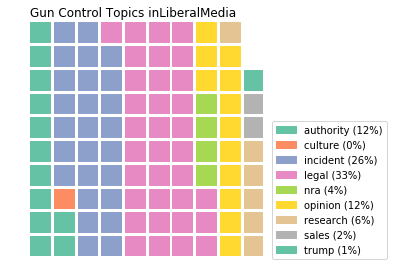

In [51]:
#plot the breakdown of topics in liberal outlets
makewaffles(lx, "Liberal", "libtopics")

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


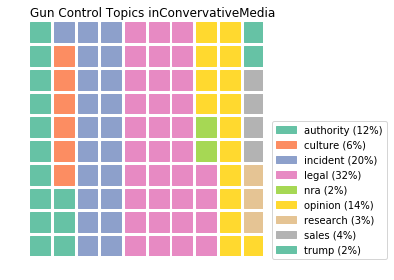

In [52]:
#plot the breakdown of topics in conservative outlets
makewaffles(cx, "Convervative", "constopics")

In [57]:
#What are the incident topics?
inlabel=df[df['global']=='incident']['specific']

In [58]:
inlx={}
for k,v in zip(inlabel, df['lib']):
    v=int((v*100)/ltot)
    inlx[k]=v
    
incx={}
for k,v in zip(inlabel, df['consv']):
    v=int((v*100)/ltot)
    incx[k]=v

{'parkland': 4, 'orlando': 5, 'chicago': 1, 'vegas': 0, 'sandyhook': 3} {'parkland': 4, 'orlando': 5, 'chicago': 2, 'vegas': 6, 'sandyhook': 5}


In [67]:
#What does the breakdown of incident topics look like for Liberal outlets
#Find another visual for this

In [68]:
#What does the breakdown of incident topics look like for Conservative outlets
#Find another visual for this